### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [7]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [8]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [9]:
#verificamos valores nules
tienda.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [14]:
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

In [15]:
tienda.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,datetime64[ns]
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#1. Análisis de facturación



In [35]:
# Calcular facturacion total (precio + costo de envio)
tienda['Facturacion'] = tienda['Precio'] + tienda['Costo de envío']








In [17]:
# Facturacio Total
facturacion_total = tienda['Facturacion'].sum()
print(f"Facturación Total: ${facturacion_total:.2f}")

Facturación Total: $1212258300.00


In [18]:
#Facturacion por ano
facturacion_total = tienda.groupby(tienda['Fecha de Compra'].dt.year)['Facturacion'].sum()
print('\nFacturacion por anual: ')
print(facturacion_total)



Facturacion por anual: 
Fecha de Compra
2020    388679400.0
2021    381340500.0
2022    333427900.0
2023    108810500.0
Name: Facturacion, dtype: float64


# 2. Ventas por categoría

In [22]:
#ventas por categoria de producto
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Electrónicos'),
  Text(1, 0, 'Electrodomésticos'),
  Text(2, 0, 'Muebles'),
  Text(3, 0, 'Instrumentos musicales'),
  Text(4, 0, 'Deportes y diversión'),
  Text(5, 0, 'Juguetes'),
  Text(6, 0, 'Artículos para el hogar'),
  Text(7, 0, 'Libros')])

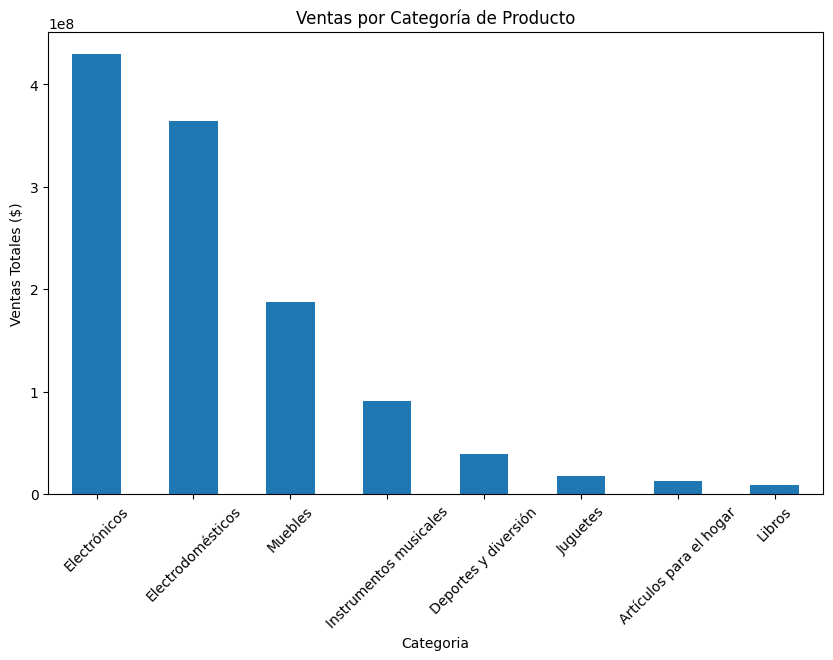

In [24]:
import matplotlib.pyplot as plt
ventas_por_categoria.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Categoría de Producto')
plt.ylabel('Ventas Totales ($)')
plt.xlabel('Categoria')
plt.xticks(rotation=45)

# 3. Calificación promedio de la tienda


In [26]:
#Calificacion promedio
calificacion_promedio = tienda['Calificación'].mean()
print(f"Calificación Promedio: {calificacion_promedio:.2f}/5")

Calificación Promedio: 3.98/5


<function matplotlib.pyplot.show(close=None, block=None)>

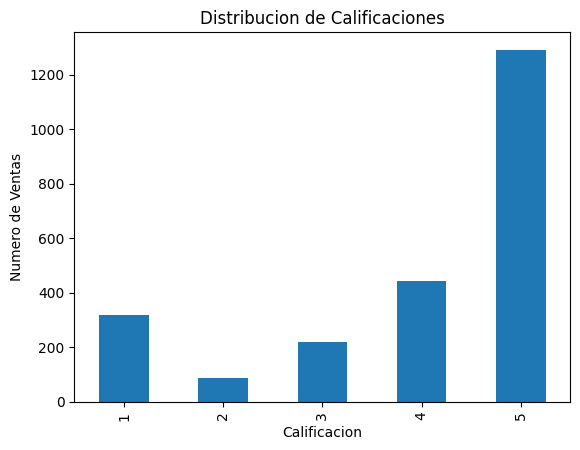

In [27]:
#Distribucion de califacaciones
distribucion_calificaciones = tienda['Calificación'].value_counts().sort_index()
distribucion_calificaciones.plot(kind = 'bar')
plt.title("Distribucion de Calificaciones")
plt.xlabel("Calificacion")
plt.ylabel("Numero de Ventas")
plt.show

# 4. Productos más y menos vendidos

In [29]:
#Productos más vendidos (por cantidad)
productos_mas_vendidos = tienda['Producto'].value_counts().head(10)

In [30]:
#Productos menos vendidos
productos_menos_vendidos = tienda['Producto'].value_counts().tail(10)
print('Top 10 productos más vendidos: ')
print(productos_menos_vendidos)
print('\nTop 10 productos menos vendidos: ')
print(productos_menos_vendidos)

Top 10 productos más vendidos: 
Producto
Muñeca bebé                    40
Mesa de comedor                40
Dinosaurio Rex                 40
Cuerda para saltar             40
Mochila                        39
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Top 10 productos menos vendidos: 
Producto
Muñeca bebé                    40
Mesa de comedor                40
Dinosaurio Rex                 40
Cuerda para saltar             40
Mochila                        39
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


# 5. Envío promedio por tienda

costro de envio promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


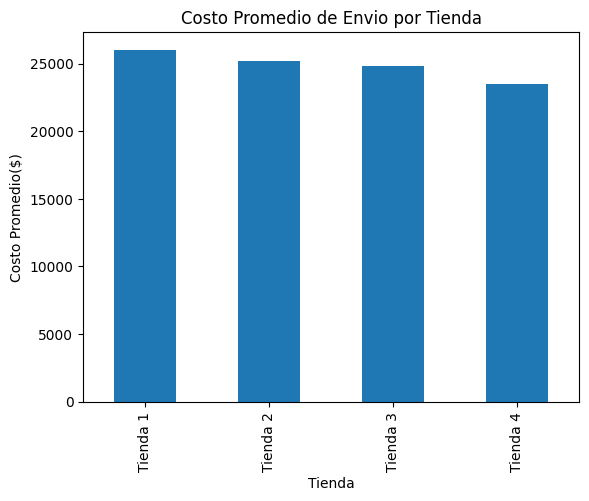

In [34]:
#Agregamos las columnas de tienda a cada datos (DATA FRAME)
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

#combinamos todos los datos
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
#promedio por tienda
envio_promedio = todas_tiendas.groupby('Tienda')['Costo de envío'].mean()
print('costro de envio promedio por tienda:')
print(envio_promedio)

#vizualizamos
envio_promedio.plot(kind = 'bar')
plt.title('Costo Promedio de Envio por Tienda')
plt.ylabel('Costo Promedio($)')
plt.xlabel('Tienda')
plt.show()


In [ ]:
# prompt: verificando este codigo que tienda es recomendable vender, solo en comentarios en espanol

import pandas as pd
import matplotlib.pyplot as plt

# ### Importación de datos
#  Se importan los datos de las cuatro tiendas desde URLs de GitHub.
#  Cada tienda se guarda en un DataFrame separado.

# ... (código de importación de datos) ...

# Se agrega una columna "Tienda" a cada DataFrame para identificar la tienda correspondiente.

# ... (código para agregar la columna 'Tienda' a cada DataFrame) ...


# Se combinan los datos de todas las tiendas en un solo DataFrame.
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Análisis de cada tienda:
# Se realiza un análisis individual para cada tienda (Tienda 1, Tienda 2, Tienda 3 y Tienda 4).
# Se calcula la facturación total, las ventas por categoría, la calificación promedio y el costo promedio de envío.

# Ejemplo para Tienda 1 (se repite para cada tienda):
# Análisis de la Tienda 1
tienda1_data = todas_tiendas[todas_tiendas['Tienda'] == 'Tienda 1']
facturacion_tienda1 = tienda1_data['Facturacion'].sum()
# ... otros cálculos para la Tienda 1 ...


# Comparación entre tiendas:

# 1. Facturación Total: Se compara la facturación total de cada tienda.
facturacion_por_tienda = todas_tiendas.groupby('Tienda')['Facturacion'].sum()

# 2. Ventas por categoría: Se puede comparar las ventas por categoría de producto en cada tienda.
ventas_por_categoria_tienda = todas_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().unstack()

# 3. Calificación promedio: Se compara la calificación promedio de cada tienda.
calificacion_promedio_tienda = todas_tiendas.groupby('Tienda')['Calificación'].mean()

# 4. Costo promedio de envío: Se compara el costo promedio de envío de cada tienda.
envio_promedio_tienda = todas_tiendas.groupby('Tienda')['Costo de envío'].mean()


# Recomendación:

# Basándonos en la facturación total, ventas por categoría, calificación promedio y costo de envío promedio, podemos recomendar una tienda para vender.
# Por ejemplo, se puede priorizar la tienda con mayor facturación y una buena calificación promedio.
# Además, considerar el costo promedio de envío y la popularidad de las categorías de productos.

# Se deben realizar análisis adicionales para determinar si las métricas son significativas y robustas,
# antes de tomar una decisión de negocio.
